In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 8s 0us/step


In [ ]:
print("X_train: ",(X_train.shape))
print("X_test: ",(X_test.shape))

X_train:  (50000, 32, 32, 3)
X_test:  (10000, 32, 32, 3)


In [ ]:
y_train[:5]    # 2 dimensional array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[8]

'ship'

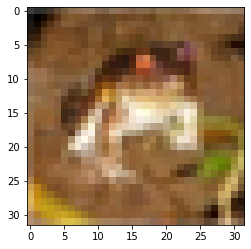

In [ ]:
plt.imshow(X_train[0])  #frog is at index 0

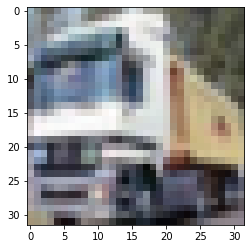

In [ ]:
plt.imshow(X_train[1])  #truck is at index 1

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

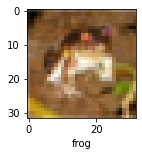

In [ ]:
plot_sample(X_train , y_train, 0)

In [ ]:
#Normalize the data
#Divide each pixel value by 255 because the pixel value ranges from 0 - 255
X_train = X_train / 255.0 
X_test = X_test / 255.0

#This normalizes it from 0-1 range

Building an Artificial Neural Network **ANN** first to check the Performance

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.8113 - accuracy: 0.3568
Epoch 2/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.6219 - accuracy: 0.4270
Epoch 3/10
1563/1563 [==============================] - 90s 57ms/step - loss: 1.5400 - accuracy: 0.4571
Epoch 4/10
1563/1563 [==============================] - 90s 57ms/step - loss: 1.4804 - accuracy: 0.4789
Epoch 5/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4306 - accuracy: 0.4966
Epoch 6/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.3875 - accuracy: 0.5106
Epoch 7/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.3492 - accuracy: 0.5248
Epoch 8/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.3142 - accuracy: 0.5390
Epoch 9/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.2793 - accuracy: 0.5507
Epoch 10/10
1563/1563 [==============================] - 89s 57m

In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.6389 - accuracy: 0.4326


[1.638891577720642, 0.4325999915599823]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report:  \n\n", classification_report(y_test, y_pred_classes))

Classification Report:  

               precision    recall  f1-score   support

           0       0.72      0.24      0.36      1000
           1       0.82      0.37      0.51      1000
           2       0.22      0.77      0.34      1000
           3       0.38      0.27      0.32      1000
           4       0.33      0.47      0.39      1000
           5       0.50      0.27      0.35      1000
           6       0.55      0.54      0.55      1000
           7       0.83      0.28      0.42      1000
           8       0.72      0.53      0.61      1000
           9       0.57      0.58      0.58      1000

    accuracy                           0.43     10000
   macro avg       0.57      0.43      0.44     10000
weighted avg       0.57      0.43      0.44     10000

Classification Report:  

               precision    recall  f1-score   support

           0       0.72      0.24      0.36      1000
           1       0.82      0.37      0.51      1000
           2       0.22 

Building a Convolutional Neural Network **(CNN)**

In [ ]:
cnn = models.Sequential([
                         
        #cnn layers
        layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu') , 
        layers.MaxPooling2D((2,2)),

        #dense layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [ ]:
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ["accuracy"])

In [ ]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.6824 - accuracy: 0.7595
Epoch 2/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.6521 - accuracy: 0.7694
Epoch 3/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.6290 - accuracy: 0.7763
Epoch 4/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.6010 - accuracy: 0.7887
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5807 - accuracy: 0.7924
Epoch 6/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.5627 - accuracy: 0.8001
Epoch 7/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.5380 - accuracy: 0.8101
Epoch 8/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5246 - accuracy: 0.8127
Epoch 9/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.5003 - accuracy: 0.8213
Epoch 10/10
1563/1563 [==============================] - 46s 29m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0875 - accuracy: 0.6806


[1.0875455141067505, 0.6805999875068665]

In [ ]:
y_test[:5]   #2 dimensional array

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1)  #converting to 1 dimensional array
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

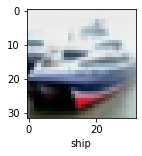

In [ ]:
plot_sample(X_test, y_test, 1)

Predicting the Model and seeing its Performance

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.7369886e-03, 6.6614222e-05, 9.0280271e-05, 6.5453762e-01,
        6.6188462e-03, 3.2367632e-01, 6.7862677e-03, 1.1806968e-03,
        3.3051935e-03, 1.1191619e-06],
       [3.0054467e-05, 1.8869616e-02, 7.9500007e-09, 4.9849194e-07,
        6.6286121e-10, 1.5287295e-09, 1.8633511e-08, 1.1776559e-11,
        9.8091942e-01, 1.8043502e-04],
       [2.2231069e-01, 2.4972237e-03, 6.5372314e-04, 2.1129495e-03,
        1.1147179e-03, 7.3532632e-05, 4.0156719e-05, 2.3497925e-04,
        7.6523340e-01, 5.7286010e-03],
       [9.8786330e-01, 2.2064701e-04, 7.0307497e-03, 1.7565796e-06,
        2.5254951e-04, 1.7336687e-07, 6.3939315e-06, 9.6193025e-06,
        4.6018353e-03, 1.2979020e-05],
       [5.3397844e-08, 7.1707262e-10, 1.3686435e-02, 4.3438923e-02,
        9.3863517e-01, 3.8413068e-03, 3.9789442e-04, 1.5485847e-07,
        1.4740385e-07, 3.0424696e-09]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

So as you can see above, our model predicts all the correct values for our classes except one value which is 6. All the other alues have been predicted successfully as a result of 82% accuracy that was achieved.

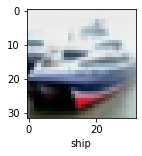

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
classes[y_classes[1]]

'ship'

'ship'

Here(above) the model has predicted correctly

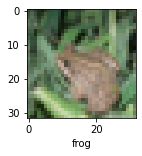

In [ ]:
plot_sample(X_test, y_test, 4)

In [ ]:
classes[y_classes[1]]